# Breast Cancer Detector using KNN


## Importing Libraries


In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Display plots inside notebook
%matplotlib inline


## Loading Dataset


In [2]:
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Dataset Information


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Dropping Unnecessary Columns


In [4]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
print(df.shape)


(569, 31)


## Converting Diagnosis Labels


In [5]:
def diagnosis_value(x):
    if x == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

## Data Visualization


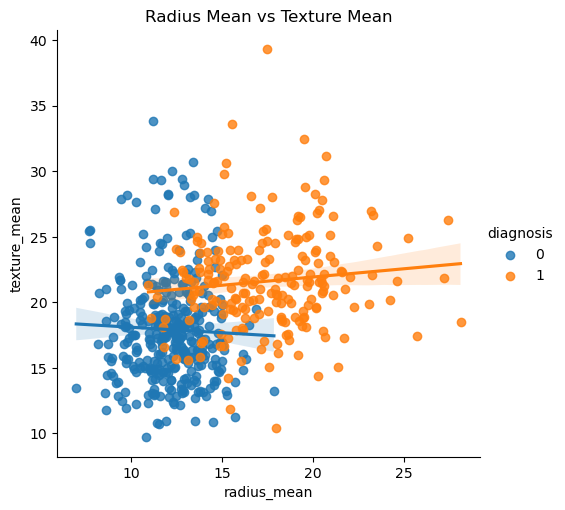

In [6]:
# Plot 1: Radius Mean vs Texture Mean
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title("Radius Mean vs Texture Mean")
plt.show()


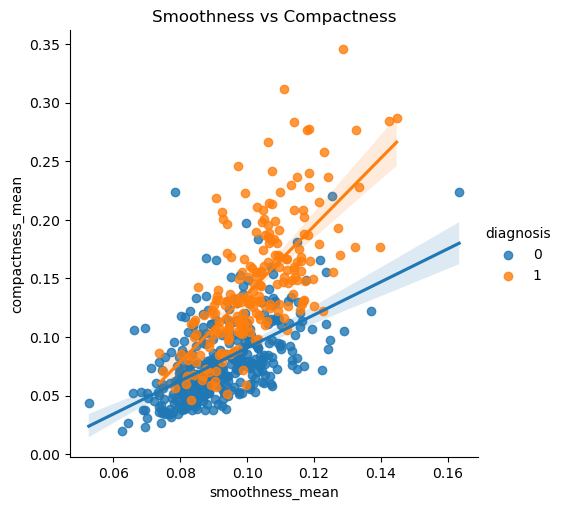

In [7]:

# Plot 2: Smoothness Mean vs Compactness Mean
sns.lmplot(x='smoothness_mean', y='compactness_mean', hue='diagnosis', data=df)
plt.title("Smoothness vs Compactness")
plt.show()


## Input and Output Data


In [8]:
# Input features (all columns except diagnosis)
X = np.array(df.iloc[:, 1:])

# Output/target (diagnosis column)
y = np.array(df['diagnosis'])


## Splitting Data into Training and Testing Sets


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


## Training the KNN Model using Sklearn


In [11]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

## Prediction Score


In [12]:
# Evaluate model accuracy on test set
knn.score(X_test, y_test)


0.9627659574468085

## Cross Validation for Optimal k


In [13]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

# Try odd k values from 1 to 50
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Misclassification error = 1 - accuracy
MSE = [1 - x for x in cv_scores]

# Find the optimal k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is:", optimal_k)


The optimal number of neighbors is: 13


## Misclassification Error Plot


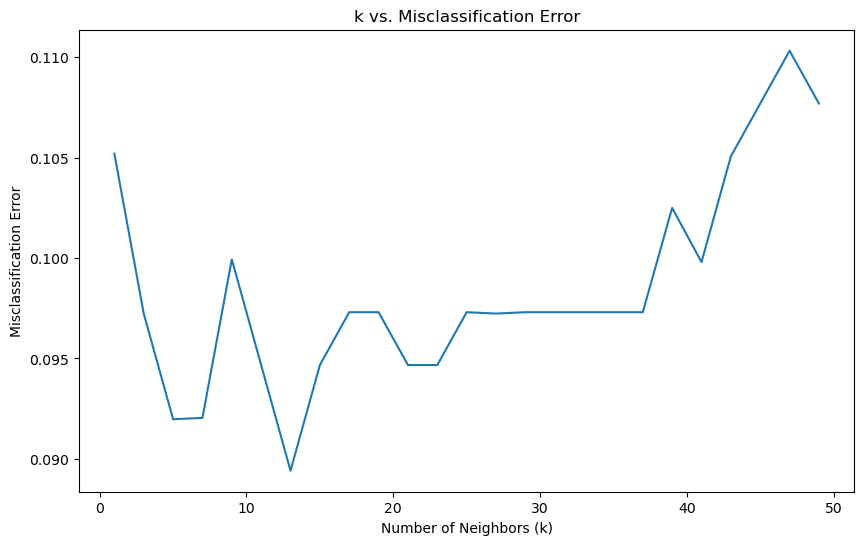

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('k vs. Misclassification Error')
plt.show()
